<a href="https://colab.research.google.com/github/cunhajessica/Churn_Prediction/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


**by Jéssica Cunha**  

---

# **Churn Prediction - Previsão de cancelamento de serviços de Telecomunicações**

Hoje em dia, manter um cliente satisfeito por um longo período, não é uma tarefa fácil, ainda mais, quando se tem diversas opções disponíveis. Pra não perder o cliente, é necessário que ele tenha a melhor experiência possível.

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo, porque o Custo da aquisição de novos clientes geralmente é mais alto do que o custo para manter os clientes que já possuem a assinatura.

*Churn* pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. 

## **Aquisição dos Dados**

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

### Dicionário das variáveis:

* `customerID` - Código de identificação do cliente.
* `gender` - Gênero do cliente.
* `SeniorCitizen` - Cliente com mais de 65 anos
* `Partner` - Cliente casado
* `Dependents` - Cliente que tem filhos
* `tenure` - Tempo que o cliente está com o plano (em meses).
* `PhoneService` - Possui serviço telefônico
* `MultipleLines` - Possui mais de um serviço
* `InternetService` - Possui serviço de internet
* `OnlineSecurity` - Possui seguro online
* `OnlineBackup` - Possui backup automatizado
* `DeviceProtection` - Possui proteção do dispositivo
* `TechSupport` - Possui suporte técnico ativado
* `StreamingTV` - Possui serviço de TV Streaming ativado
* `StreamingMovies` - Possui serviço de filmes Streaming ativado
* `Contract` - Tipo de contrato
* `PaperlessBilling` - Faturamento sem papel ativado
* `PaymentMethod` - Método de pagamento
* `MonthlyCharges` - Valor mensal pago pelo cliente
* `TotalCharges` - Valor total que o cliente pagou até o momento
* `Churn` - Clientes que cancelaram o serviço

## **Análise Exploratória dos Dados**



In [ ]:
# instalando os pacotes necessários
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:
# retirando os warnings do código
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# importando os pacotes para a análise dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importando o pacote para balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# importando os pacotes sklearn
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#importando o classificador do xgboost
from xgboost import XGBClassifier

#importando o classificador do LGBM
from lightgbm import LGBMClassifier

In [ ]:
# importando os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A visualização das 5 primeiras entradas já permite entender como o dataset está composto. 

Agora vamos verificar mais detalhes do dataset. 

O que vamos verificar?
- Dimensões dos dados;
- Os dados ausentes;
- O tipo de cada variável;
- A quantidade de valores únicos por coluna;

In [ ]:
#Verificando as dimensões dos dados
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))


Linhas:		7043
Colunas:	21


In [ ]:
#Tipos das variáveis
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


A maioria das variáveis estão como `object`, inclusive a variável TotalCharges que deveria ser - `float`. Sendo assim, vamos transformá-la, mas antes disso vamos verificar a quantidade de dados nulos.

In [ ]:
#Avaliando a quantidade de valores ausentes
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de dados nulos'])

,Quantidade de dados nulos
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Aparentemente não existem valores ausentes, porém, vamos verificar um pouco mais.

In [ ]:
df[['tenure','MonthlyCharges','TotalCharges','Churn']][df['tenure'] == 0]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,,No
753,0,20.25,,No
936,0,80.85,,No
1082,0,25.75,,No
1340,0,56.05,,No
3331,0,19.85,,No
3826,0,25.35,,No
4380,0,20.00,,No
5218,0,19.70,,No
6670,0,73.35,,No


A coluna `tenure`está com o valor zero devido o cliente ainda não haver completado um mês de assinatura, uma vez que se trata do tempo de aquisição do serviço.

Geralmente quando a coluna `tenure` está com o valor zero, a coluna `TotalCharges` está com os valores em branco, porém, ao verificar os dados nulos não aparecia. Vamos então, transforma-la em uma variável numérica.



In [ ]:
#mudando o TotalCharges para float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

* errors = 'coerce': transforma dados inválidos em NaN, então ao verificarmos novamente a quantidade de dados nulos, aparecerá.

In [ ]:
#Avaliando a quantidade de valores ausentes após transformar em float
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de dados nulos'])

,Quantidade de dados nulos
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Convertendo a variável `TotalCharges` em float, aparecem 11 valores ausentes, todas essas entradas, na variável `tenure` tem o valor em zero. Sendo assim, 
estaremos excluindo essas entradas porque esses clientes ainda não possuem um mês de serviço e não influenciarão nas nossas análises de Churn.

In [ ]:
#criando uma cópia dos dados
df_clean = df.copy()

#tratando dos valores vazios
df_clean.dropna(inplace=True)

Vamos verificar os valores únicos por coluna, isso irá auxiliar na identificação de variáveis potencialmente categóricas.

In [ ]:
#verificando os valores únicos por coluna
pd.DataFrame(df_clean.nunique(),columns=['Quantidade de valores únicos por variável'])

,Quantidade de valores únicos por variável
customerID,7032
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


Várias features precisam ser codificadas para valores numéricos, para serem utilizadas em nosso modelo.
Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.

A variável alvo está na coluna `Churn`, indicando a situação de churn.

Também, observa-se que a coluna `costumerID` não agrega nenhuma informação, pois se trata de um identificador único para cada cliente, sendo assim, podemos eliminá-lo antes de usar no modelo de machine learning.

In [ ]:
# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

In [ ]:
#verificando dados estatísticos dos dados
df_clean.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Analisando os dados estatísticos podemos perceber que 75% dos clientes:


*   Possuem 4 anos e 5 meses de utilização do serviço;

*   Pagam uma taxa mensal de $ 89,86.

*   No período de 55 meses, cada cliente já pagou o total de $ 3.794,73.


Analisando o boxplot para as colunas `MonthlyCharges` e `TotalCharges`, percebemos que o gráfico não apresenta nenhum valor fora dos limites superior e inferior.

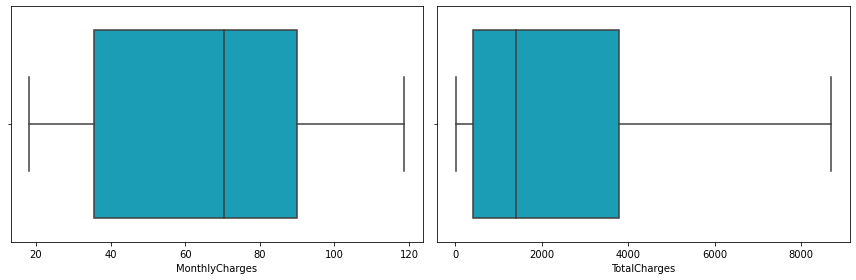

In [ ]:
#boxplot para as variáveis MonthlyCharges e TotalCharges
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0], color='#00AFCF')
sns.boxplot(df_clean['TotalCharges'], ax=ax[1], color='#00AFCF')
plt.tight_layout()

A variável `tenure` está relacionada ao tempo que um cliente permance assinando determinado serviço, por mês. Em outras palavras, pode-se dizer que é um indicativo de fidelidade.

###**Quantidade de clientes por mês de utilização do serviço**

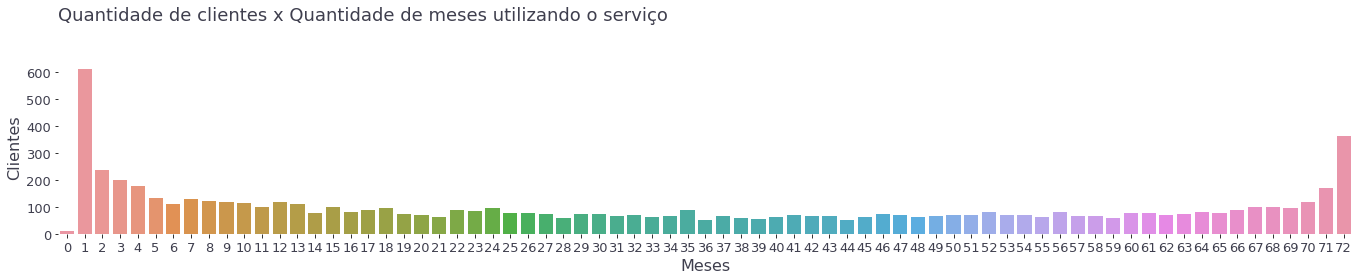

In [ ]:
#verificando a quantidade de clientes por mês
fig, ax = plt.subplots(figsize=(19, 4))
sns.countplot(df['tenure'], ax=ax)
ax.set_title('Quantidade de clientes x Quantidade de meses utilizando o serviço', loc='left', pad=40, fontdict={'fontsize':18}, color='#3f3f4e');
ax.set_frame_on(False)
plt.yticks(fontsize=13, color='#3f3f4e')
plt.xticks(fontsize=13, color='#3f3f4e')
ax.set_ylabel('Clientes', fontsize=16, color='#3f3f4e')
ax.set_xlabel('Meses', fontsize=16, color='#3f3f4e')
plt.tight_layout()

Vamos ver também a quantidade de clientes por tipo de contrato.

###**Quantidade de clientes por tipo de contrato**

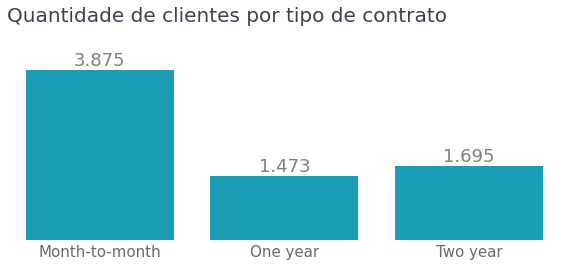

In [ ]:
#criando o gráfico
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(df['Contract'], color='#00AFCF', ax=ax)
ax.set_title('Quantidade de clientes por tipo de contrato', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_frame_on(False)
plt.yticks(fontsize=13, color='#3f3f4e')
plt.xticks(fontsize=13, color='#3f3f4e')
ax.tick_params(axis='x', length=0, labelsize=15, colors='dimgrey')
ax.set_xlabel(' ')
ax.get_yaxis().set_visible(False)

#incluindo os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

In [ ]:
print('CONTRATOS CANCELADOS')
print('Tipo de contrato x Qtd. de clientes que cancelaram')
print(df_clean[df_clean.Churn == 'Yes'].Contract.value_counts())

CONTRATOS CANCELADOS
Tipo de contrato x Qtd. de clientes que cancelaram
Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64


A maioria dos clientes que cancelaram, possuem o tipo de contrato "Mensal".

###**Quantidade de clientes que cancelaram o serviço**

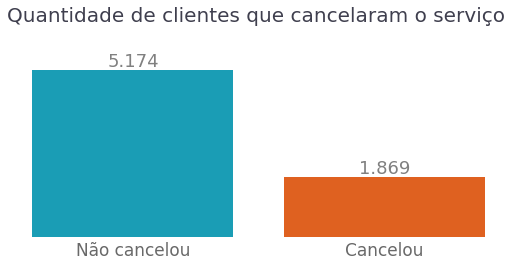

In [ ]:
#criando o gráfico
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(df['Churn'], ax=ax, palette=['#00AFCF','#ff5700'])
ax.set_title('Quantidade de clientes que cancelaram o serviço', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax.set_frame_on(False)
ax.set_xticklabels(['Não cancelou','Cancelou'])
ax.tick_params(axis='x', length=0, labelsize=17, colors='dimgrey')
ax.set_xlabel(' ')
ax.get_yaxis().set_visible(False)

#incluindo os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

In [ ]:
# % cancelamentos
print(f'Não cancelou o serviço: {df.Churn.value_counts()[0] / df.shape[0]*100:.2f}%')
print(f'Cancelou o serviço: {df.Churn.value_counts()[1] / df.shape[0]*100:.2f}%')

Não cancelou o serviço: 73.46%
Cancelou o serviço: 26.54%


Podemos observar que os dados estão desbalanceados, e será necessário efetuarmos o balanceamento posteriormente.

###**Quantidade de clientes por gênero**

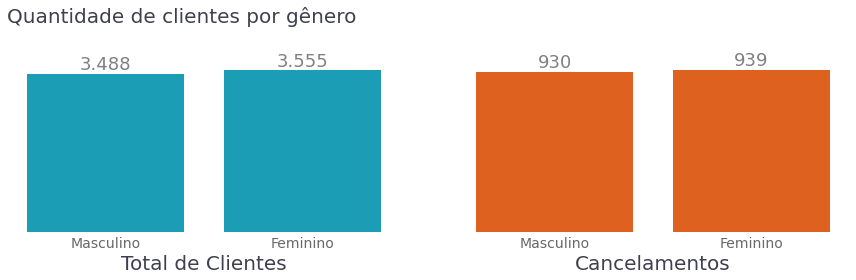

In [ ]:
# criando o gráfico
fig, ax = plt.subplots(figsize=(12,4),nrows=1, ncols=2)
sns.countplot(x=df.gender, ax=ax[0],color='#00AFCF');
sns.countplot(x=df[df.Churn == 'Yes'].gender, ax=ax[1],color='#ff5700');
ax[0].set_title('Quantidade de clientes por gênero', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_xticklabels(['Masculino','Feminino'])
ax[1].set_xticklabels(['Masculino','Feminino'])
ax[0].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[0].set_xlabel('Total de Clientes', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('Cancelamentos', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 30,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

Podemos perceber que a quantidade de homens e mulheres são similares, inclusive para os cancelamentos, sendo assim, concluimos que o gênero não tem relação com os cancelamentos.

###**Quantidade de clientes com mais de 65 anos**

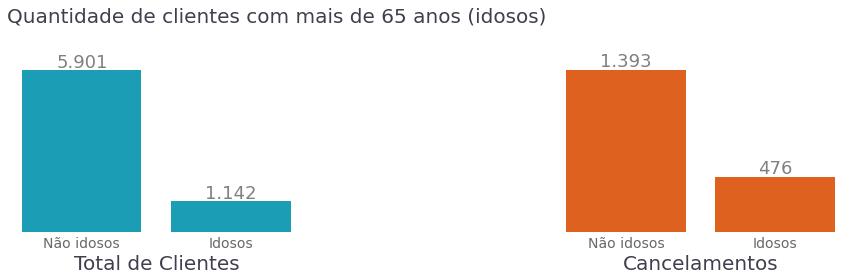

In [ ]:
# criando o gráfico
fig, ax = plt.subplots(figsize=(12,4),nrows=1, ncols=2)
sns.countplot(x=df.SeniorCitizen, ax=ax[0],color='#00AFCF');
sns.countplot(x=df[df.Churn == 'Yes'].SeniorCitizen, ax=ax[1],color='#ff5700');
ax[0].set_title('Quantidade de clientes com mais de 65 anos (idosos)', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_xticklabels(['Não idosos','Idosos'])
ax[1].set_xticklabels(['Não idosos','Idosos'])
ax[0].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[0].set_xlabel('Total de Clientes', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('Cancelamentos', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 30,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

Há muito mais clientes não idosos. Podemos observar que há quase 3x mais chances de um não idoso cancelar o serviço.

###**Quantidade de clientes casados**

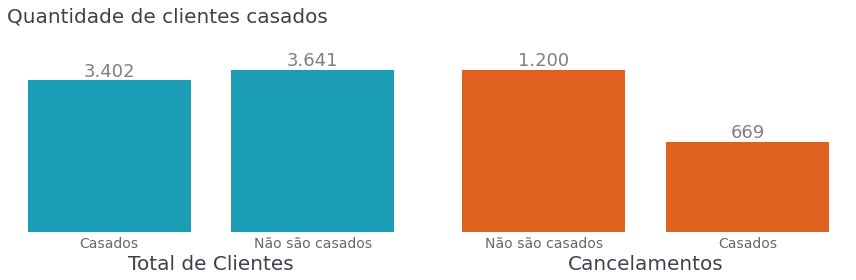

In [ ]:
# criando o grafico
fig, ax = plt.subplots(figsize=(12,4),nrows=1, ncols=2)
sns.countplot(x=df.Partner, ax=ax[0],color='#00AFCF');
sns.countplot(x=df[df.Churn == 'Yes'].Partner, ax=ax[1],color='#ff5700');
ax[0].set_title('Quantidade de clientes casados', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_xticklabels(['Casados','Não são casados'])
ax[1].set_xticklabels(['Não são casados','Casados'])
ax[0].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[0].set_xlabel('Total de Clientes', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('Cancelamentos', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 30,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

A quantidade total de clientes casados e não casados estão bem próximas, porém, quase o dobro de pessoas que não são casadas, cancelaram o serviço.

###**Quantidade de clientes com filhos**

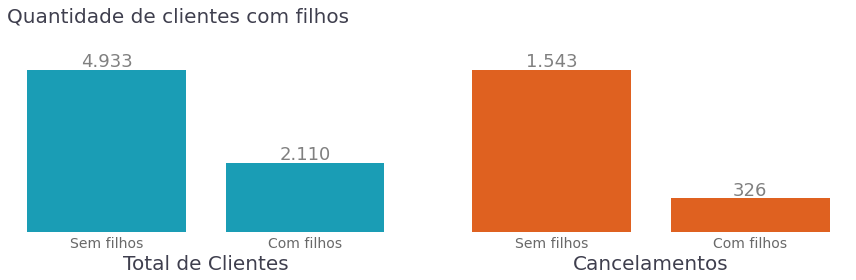

In [ ]:
# criando o grafico
fig, ax = plt.subplots(figsize=(12,4),nrows=1, ncols=2)
sns.countplot(x=df.Dependents, ax=ax[0],color='#00AFCF');
sns.countplot(x=df[df.Churn == 'Yes'].Dependents, ax=ax[1],color='#ff5700');
ax[0].set_title('Quantidade de clientes com filhos', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_xticklabels(['Sem filhos','Com filhos'])
ax[1].set_xticklabels(['Sem filhos','Com filhos'])
ax[0].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[0].set_xlabel('Total de Clientes', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('Cancelamentos', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 30,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

Há muito mais clientes sem filhos, inclusive o cancelamento entre pessoas sem filhos ocorre quase 5x mais, que os que possuem dependentes.

###**Quantidade de clientes por forma de pagamento**

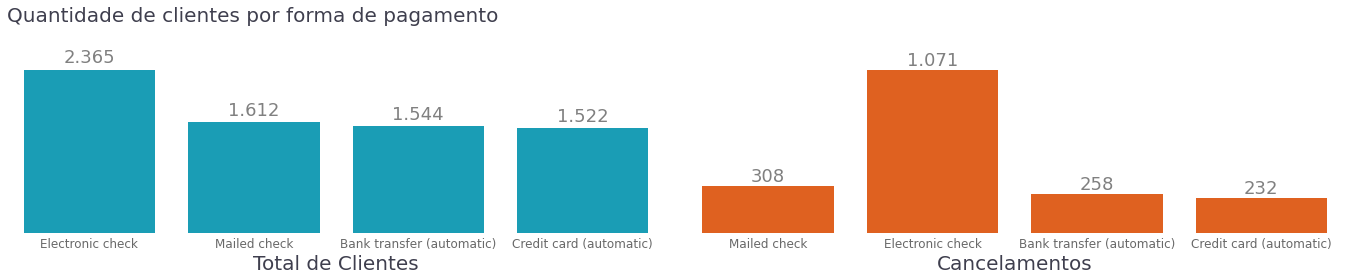

In [ ]:
# criando o grafico
fig, ax = plt.subplots(figsize=(19,4),nrows=1, ncols=2)
sns.countplot(x=df.PaymentMethod, ax=ax[0],color='#00AFCF');
sns.countplot(x=df[df.Churn == 'Yes'].PaymentMethod, ax=ax[1],color='#ff5700');
ax[0].set_title('Quantidade de clientes x Forma de pagamento', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
#ax[0].set_xticklabels(['Sem filhos','Com filhos'])
#ax[1].set_xticklabels(['Sem filhos','Com filhos'])
ax[0].tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax[0].set_xlabel('Total de Clientes', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('Cancelamentos', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 30,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

Vemos que não há muita diferença na forma de pagamento entre o total de clientes, porém, em relação aos clientes que cancelaram, a maioria pagou com cheque eletrônico.
Esssa modalidade não é muito comum no Brasil, mas refere-se a basicamente o preenchimento de um formulário de pagamento online, onde se autoriza o beneficiário a retirar o valor especificado.


##**Preparação dos Dados**

Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base. 

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`. Vale lembrar que isso inclui a variável alvo `Churn`. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos.

* **O que o Label Encoder faz?** Para o Label Encoding, atribuímos a cada categoria um número (0, 1). Usaremos para transformar as variáveis binárias.
* **O que são variáveis dummy?** Diferente do Label Encoding, onde cada categoria assume um valor numérico, aqui criamos uma espécie de matriz esparça, onde cada categoria ganha uma coluna, com valores 0 indicando ausência, e 1 presença.

In [ ]:
# pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
# quantidade de colunas
print(f'Quantiade de colunas original: {df.shape[1]}')
print(f'Quantiade de colunas após tratamento: {df_proc.shape[1]}')

Quantiade de colunas original: 21
Quantiade de colunas após tratamento: 41


##**Divisão dos dados**

Vamos separar os dados de treino e os dados de teste.

*   **Dados de treino:** serve para treinar o modelo.
*   **Dados de teste:** usado somente no final, depois de o modelo estar pronto e otimizado, para ver a real performance deste modelo.

In [ ]:
# criando o conjunto de teste
df_test = df_proc.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df_treino = df_proc.drop(df_test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", df_test.shape)
print("Dimensões do Conjunto de Treino: ", df_treino.shape)

Dimensões do Conjunto de Teste:  (1055, 41)
Dimensões do Conjunto de Treino:  (5977, 41)


Agora vamos dividir novamente os dados de treino:

*   **Dados de treino:** como mencionamos anteriormente, é usado para treinar o modelo.
*   **Dados de validação:** utilizado para avaliar o desempenho de cada modelo e hiperparâmetros.

In [ ]:
# separando as variáveis entre X e y
X = df_treino.drop('Churn', axis=1)
y = df_treino['Churn']

# dividir o dataset entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

##**Feature Scaling**

Essa etapa tem o objetivo de redimencionar os dados, para que venham a ter a mesma ordem de grandeza, a mesma escala. Os dados permanecem os mesmos, a mudança é somente para uma escala em comum. É importante para evitar que o algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

Iremos Padronizar os **dados de treino** usando a classe **`StandardScaler`**. Posteriormente será necessário padronizarmos os **dados de validação** e **dados de teste** também.

In [ ]:
#padronizando os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

##**Balanceamento dos dados**

É importante efetuar o balanceamento dos dados porque **o conjunto de dados de treino pode influenciar muitos algoritmos de aprendizado de máquina, levando alguns a ignorar completamente a classe minoritária**. Isso é um problema, pois normalmente é a classe minoritária que desejamos fazer as previsões, no caso, os clientes que cancelaram o serviço.

Para resolver o problema de desequilíbrio de classe vamos reamostrar aleatoriamente o conjunto de dados de treino. Para isso vamos usar as técnicas Undersampling e Oversampling.

* **Random Undersampling:** Exclui aleatoriamente exemplos na classe majoritária, e é mais utilizado quando há grande volume de dados, porém, pode resultar na perda de informações para o modelo.
* **Oversampling (SMOTE):** Exemplos duplicados aleatoriamente na classe minoritária. Nenhuma informação é descartada, porém, pode resultar em perda de performance para a classe minoritária em alguns modelos.

<p align=center>
<img src="https://miro.medium.com/max/700/1*-aXoVoxBq5_wmUkkNQzPqQ.png" width="100%"></p> 
<p align=center><font size="2">Fonte: by Mars - Analytics Vidhya</font></p>



In [ ]:
# usar técnica undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# usar técnica SMOTE
smt = SMOTE()
X_ros, y_ros = smt.fit_resample(X_train, y_train)


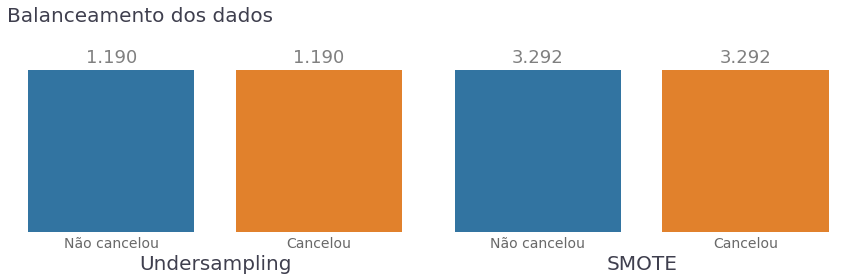

In [ ]:
# checando se os dados estão balanceados
fig, ax = plt.subplots(figsize=(12,4),nrows=1, ncols=2)
sns.countplot(x=y_rus, ax=ax[0]); #undersampling
sns.countplot(x=y_ros, ax=ax[1]); #smote

ax[0].set_title('Balanceamento dos dados', loc='left', pad=40, fontdict={'fontsize':20}, color='#3f3f4e');
ax[0].set_frame_on(False)
ax[1].set_frame_on(False)
ax[0].set_xticklabels(['Não cancelou','Cancelou'])
ax[1].set_xticklabels(['Não cancelou','Cancelou'])
ax[0].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[1].tick_params(axis='x', length=0, labelsize=14, colors='dimgrey')
ax[0].set_xlabel('Undersampling', fontdict={'fontsize':20}, color='#3f3f4e')
ax[1].set_xlabel('SMOTE', fontdict={'fontsize':20}, color='#3f3f4e')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)


#incluindo os rótulos
for retangulo in ax[0].patches:
  ax[0].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 50,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')
  
for retangulo in ax[1].patches:
  ax[1].text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 150,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18, color='grey')

#plotando o gráfico
plt.tight_layout()

##**Cross-Validation**

Também chamada de **validação cruzada**, é uma técnica para avaliar como a análise estatística se generaliza para um conjunto de dados independente. É uma técnica para avaliar modelos de aprendizado de máquina treinando vários modelos em subconjuntos dos dados de entrada disponíveis e avaliando-os no subconjunto complementar dos dados. Usando validação cruzada, há grandes chances de que possamos detectar o ajuste excessivo com facilidade.

Utilizaremos o **Recall como métrica para avaliar o modelo**.


*   **Recall**: Refere-se a todos os clientes que cancelaram o serviço, em relação a quantos o modelo conseguiu identificar, acertar. Representa a capacidade do modelo em prever se um cliente irá cancelar o serviço.




In [ ]:
#função cross-validation
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

In [ ]:
# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.50 (+/- 0.02)


O primeiro modelo utilizado na validação cruzada foi o **Random Forest**, que será o nosso *baseline*. Esse modelo é muito poderoso porque consiste em um grande número de árvores de decisão.
O resultado obtido será utilizado como comparação com os próximos modelos a serem verificados.

O **Recall** obtido no modelo **Random Forest** foi de **50%**, o que significa que o modelo consegue prever 50% dos potenciais clientes a cancelarem o serviço.

## **Modelos de Machine Learning**

Após a análise exploratória e os dados preparados, podemos instanciar os modelos de aprendizado supervisionado.

Para verificar a validação cruzada dos modelos utilizaremos os dados balanceados UnderSampling e SMOTE, verificando qual o de melhor performance.

Os modelos de classificação que iremos analisar, serão:

* **Decision Tree**
* **Random Forest**
* **Stochastic Gradient Descent**
* **SVC**
* **Regressão Logística**
* **XGBoost**
* **LightGBM**

Abaixo segue uma breve explicação sobre cada modelo:

* **Decision Tree**:Uma árvore de decisão geralmente começa com um único nó, que se divide em possíveis resultados, ou seja, pode ser um questionamento se dividindo em sim ou não. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades. Assim, cria-se uma forma de árvore, até chegar no resultado final.

* **Random Forest**: Em português, Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo, que irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final.

* **Stochastic Gradient Descent**: SGD ou Gradiente Descendente Estocástico é um algoritmo de otimização frequentemente usado em aplicativos de aprendizado de máquina para encontrar os parâmetros do modelo que correspondem ao melhor ajuste entre as saídas previstas e reais . É uma técnica inexata, mas poderosa. A descida de gradiente estocástica é amplamente utilizada em aplicações de aprendizado de máquina.

* **SVC**: Support Vector Machine. Nesse algoritmo, plota-se cada item de dados como um ponto no espaço n-dimensional (onde n é o número de recursos que você tem), com o valor de cada recurso sendo o valor de uma determinada coordenada. Então, executa-se a classificação encontrando o hiperplano que melhor diferencia as duas classes.

* **Regressão Logística**: Este tipo de algoritmo de machine learning analisa diferentes aspectos ou variáveis de um objeto para depois determinar uma classe na qual ele se encaixa melhor.

* **XGBoost**: O nome XGBoost vem de e**X**treme **G**radient **Boos**ting. O potencial do XGBoost é devido à técnica de Gradient Boosting, capaz de combinar resultados de diversos classificadores "fracos" (tipicamente árvores de decisão) que são combinados mediante um comitê forte de decisão.

* **LightGBM**: LightGBM, abreviação de Light Gradient Boosting Machine. LightGBM é considerado um algoritmo muito rápido e o algoritmo mais utilizado em aprendizado de máquina quando se trata de obter resultados rápidos e de alta precisão.

##**Cross-Validation com dados balanceados por Undersampling**

Agora vamos aplicar a validação cruzada nos modelos balanceados com a técnica undersampling e verificar quais tiveram o melhor desempenho. Lembrando que para isso utilizamos apenas os dados de treino.

In [ ]:
# instanciando os modelos
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [ ]:
# undersampling - aplicando validação cruzada nos modelos
model = []
recall = []

# avaliar o desempenho (recall)
for clf in (dt, rf, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_rus, y_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
DecisionTreeClassifier,0.664706
RandomForestClassifier,0.753782
SGDClassifier,0.775630
SVC,0.790756
LogisticRegression,0.797479
XGBClassifier,0.784034
LGBMClassifier,0.771429


Os que tiveram o melhor "Recall" foram os modelos de Regressão logística (79,7%), SVC (79,0%) e o XGBoss (78,4%).

##**Cross-Validation com dados balanceados por SMOTE**

Agora vamos aplicar a validação cruzada nos modelos balanceados com a técnica SMOTE e verificar quais tiveram o melhor desempenho.

In [ ]:
# SMOTE - aplicando validação cruzada nos modelos
model = []
recall = []

# avaliar o desempenho (recall)
for clf in (dt, rf, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_ros, y_ros, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
DecisionTreeClassifier,0.790179
RandomForestClassifier,0.858849
SGDClassifier,0.776730
SVC,0.839349
LogisticRegression,0.808337
XGBClassifier,0.851565
LGBMClassifier,0.840652


Já com a técnica de balanceamento SMOTE, o que teve um melhor "Recall" foi o modelo RandomForest (85,8%), seguido do XGBoss (85,1%).

Como o modelo XGBoss posui diversos hiperparâmetros, e por ter um desempenho similar ao primeiro colocado, vamos optar por escolher este modelo e melhorá-lo ainda mais.

Como a técnica de SMOTE pode diminuir a capacidade de previsão da classe minoritária vamos testar o **XGBoss** também com o Undersampling, ao introduzirmos os hiperparâmetros.


## **Otimização dos Hiperparâmetros**

XGBoost possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Iremos ajustar o número de estimadores. O modelo foi instanciado com a `learning_rate=0.1`.

Mas antes de partirmos para os testes, vamos verificar o que significa cada um dos parâmetros que vamos verificar.

*   **learning_rate**: Refere-se a uma taxa de aprendizado estática. Para dimensionar as das atualizações de parâmetros do gradiente.
*   **max_depth:** A profundidade máxima da árvore. A quantidade máxima de "nós" que podem haver da raiz até uma folha. Quanto maior, mais complexo será o modelo, portanto deve haver um equilíbrio para evitar tanto um overfitting (complexo demais) quanto underfitting (simples demais).
*   **n_estimators**: Refere-se ao número de árvores a serem geradas.
*   **min_child_weight**: O peso mínimo, ou quantidade mínima de amostras se todas tiverem peso 1, necessário para cada árvore criar um novo "nó". Um valor pequeno vai permitir o algoritmo criar Nodes que correspondem a uma quantidade menor de amostras, fazendo assim o modelo ficar mais complexo.
*   **gamma**: Redução de perda mínima necessária para fazer uma partição adicional em um "nó" da árvore. Quanto maior for a gamma, mais conservador será o algoritmo.

***Como vamos otimizar os hiperparâmetros?*** Faremos isso utilizando a técnica **Grid Search**, que nos ajuda a encontrar os melhores parâmetros para o nosso modelo. Basicamente, ele testa diferentes combinações de parâmetros, retendo os melhores resultados para cada um deles, retornando a melhor combinação possível de parâmetros para aquele conjunto de dados específico.
Essa é uma forma muito direta e eficiente de melhorar os resultados dos nossos modelos.





##**Testando XGBoost com Undersampling**

In [ ]:
xgb_rus = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(20, 50, 100),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.807563025210084 para {'n_estimators': 20}


Com o número de estimadores igual a 20, realizaremos a busca pelos parâmetros `max_depth` e `min_child_weight`.

In [ ]:
xgb_rus = XGBClassifier(learning_rate=0.1, n_estimators=20)

param_grid = {
 'max_depth':range(1, 2, 3),
 'min_child_weight':range(1, 3, 5)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8478991596638655 para {'max_depth': 1, 'min_child_weight': 1}


Obtidos os valores de `max_depth=1` e `min_child_weight=1`, irei otimizar o parâmetro `gamma`.

In [ ]:
xgb_rus = XGBClassifier(learning_rate=0.1, n_estimators=20, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8394957983193276 para {'gamma': 0.0}


Por fim, obtido `gamma=0`, vou testar quatro valores para a `learning_rate` e ver qual oferece o melhor resultado.

In [ ]:
xgb_rus = XGBClassifier(n_estimators=20, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8865546218487396 para {'learning_rate': 0.001}


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando `recall` como sendo a principal métrica.

Agora vamos verificar com os dads de validação para termos uma ideia do desempenho final.

##**Validação do modelo com os hiperparâmetros (Undersampling)**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1098
           1       0.43      0.89      0.58       397

    accuracy                           0.66      1495
   macro avg       0.68      0.73      0.65      1495
weighted avg       0.80      0.66      0.68      1495

AUC: 0.7325



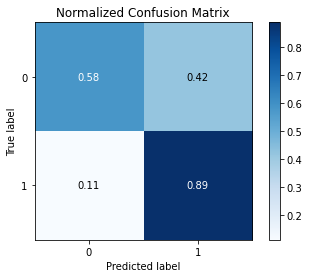

In [ ]:
# modelo validação
xgb_rus = XGBClassifier(learning_rate=0.001 , n_estimators=20, max_depth=1, min_child_weight=1, gamma=0.0)
xgb_rus.fit(X_rus, y_rus)

# fazer a previsão
X_val_rus = scaler.transform(X_val)
y_pred_rus = xgb_rus.predict(X_val_rus)

# Classification Report
print(classification_report(y_val, y_pred_rus))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_rus)))

# plotar matriz de confusão
plot_confusion_matrix(y_val, y_pred_rus, normalize=True)
plt.show()

Com os dados de validação, e balanceamento Undersampling, tivemos um desempenho maior do Recall. Na validação cruzada, tivemos 78% e agora 89%. 

Agora vamos fazer o mesmo, porém, com os dados balanceados com a técnica SMOTE.

##**Testando XGBoost com SMOTE**

In [ ]:
xgb_ros = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(20, 40, 50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ros, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8399171041724234 para {'n_estimators': 20}


In [ ]:
xgb_ros = XGBClassifier(learning_rate=0.1, n_estimators=20)

param_grid = {
 'max_depth':range(1,2,3),
 'min_child_weight':range(1,3,3)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ros, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8304936907064567 para {'max_depth': 1, 'min_child_weight': 1}


In [ ]:
xgb_ros = XGBClassifier(learning_rate=0.1, n_estimators=20, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ros, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8274707561941603 para {'gamma': 0.0}


In [ ]:
xgb_ros = XGBClassifier(n_estimators=20, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ros, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ros, y_ros)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9055355991526206 para {'learning_rate': 0.001}


##**Validação do modelo com os hiperparâmetros (SMOTE)**

              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1098
           1       0.43      0.89      0.58       397

    accuracy                           0.66      1495
   macro avg       0.68      0.73      0.65      1495
weighted avg       0.80      0.66      0.68      1495

AUC: 0.7325



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


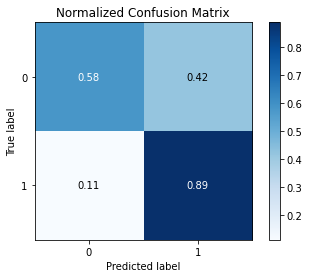

In [ ]:
# modelo validação
xgb_ros = XGBClassifier(learning_rate=0.001 , n_estimators=20, max_depth=1, min_child_weight=1, gamma=0.0)
xgb_ros.fit(X_ros, y_ros)

# fazer a previsão
X_val_ros = scaler.transform(X_val)
y_pred_ros = xgb_ros.predict(X_val_ros)

# Classification Report
print(classification_report(y_val, y_pred_ros))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_ros)))

# plotar matriz de confusão
plot_confusion_matrix(y_val, y_pred_ros, normalize=True)
plt.show()

Utilizando os dados de validação, e a técnica SMOTE, tivemos um desempenho similar ao encontrado na validação cruzada.
* Validação Cruzada: Recall 85%
* Dados de validação: Recall 89%

Sendo assim, utilizaremos a técnica SMOTE para verificação dos dados de teste.

##**Verificando o modelo com os dados de teste**

              precision    recall  f1-score   support

           0     0.9287    0.5731    0.7088       773
           1     0.4291    0.8794    0.5767       282

    accuracy                         0.6550      1055
   macro avg     0.6789    0.7263    0.6428      1055
weighted avg     0.7952    0.6550    0.6735      1055

AUC: 0.7263


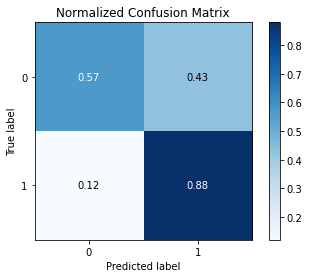

In [ ]:
# escolhendo o método de padronização
teste = df_test.copy()

X_teste = teste.drop('Churn', axis=1)
y_teste = teste['Churn']

X_teste = scaler.transform(X_teste)

y_prev_teste = xgb_ros.predict(X_teste) 

# medidas de avaliação
print(classification_report(y_teste, y_prev_teste, digits=4))
# Acurácia
print("AUC: {:.4f}".format(roc_auc_score(y_teste, y_prev_teste)))
# matriz de confusão
plot_confusion_matrix(y_teste, y_prev_teste, normalize=True)

## **Conclusões**

*   Os dados de teste foram verificados utilizando o modelo XGBoost, com a técnica de balanceamento SMOTE.

*   Ao final dos testes feitos, o modelo obteve os resultados abaixo:
  *   **Recall**: 87,9%
  *   **Acurácia**: 65,5%
  *   **AUC**: 72,6%


* Tendo em vista que usamos como principal métrica o Recall, que é a capacidade do modelo de prever os cancelamentos, o modelo obteve um resultado satisfatório de 87,9%.

* A acurária do modelo ficou em 65,5%, a qual representa a porcentagem de acertos do modelo.

* A AUC teve como resultado 72,6%, ela indica a capacidade do modelo identificar entre os cancelamentos e os não cancelamentos.

* Ainda há possibilidades de otimizar o modelo ainda mais, mas com o resultado obtido já é possível verificar formas de retenção dos possíveis clientes que efetuarão o cancelamento, evitando assim, prejuízos financeiros para a empresa de telecomunicações.

* Aos clientes identificados como possíveis canceladores, a empresa poderia enviar um desconto antecipado, um brinde, etc. Além de procurar entender mais de perto, o motivo que pode levar um cliente a cancelar o serviço.
